### Importing the libraries required

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### First Let's Import the data.

In [79]:
df = pd.read_csv("./sample_data.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
#Converted the timezone to Nepal.
df.index = df.index.tz_convert("Asia/Kathmandu")
df.index = pd.date_range(start=df.index[0], periods=len(df), freq='D', tz='Asia/Kathmandu')

### Line Graph

<Axes: title={'center': 'Daily Median AQI Over Time'}, xlabel='Date', ylabel='Median PM2.5'>

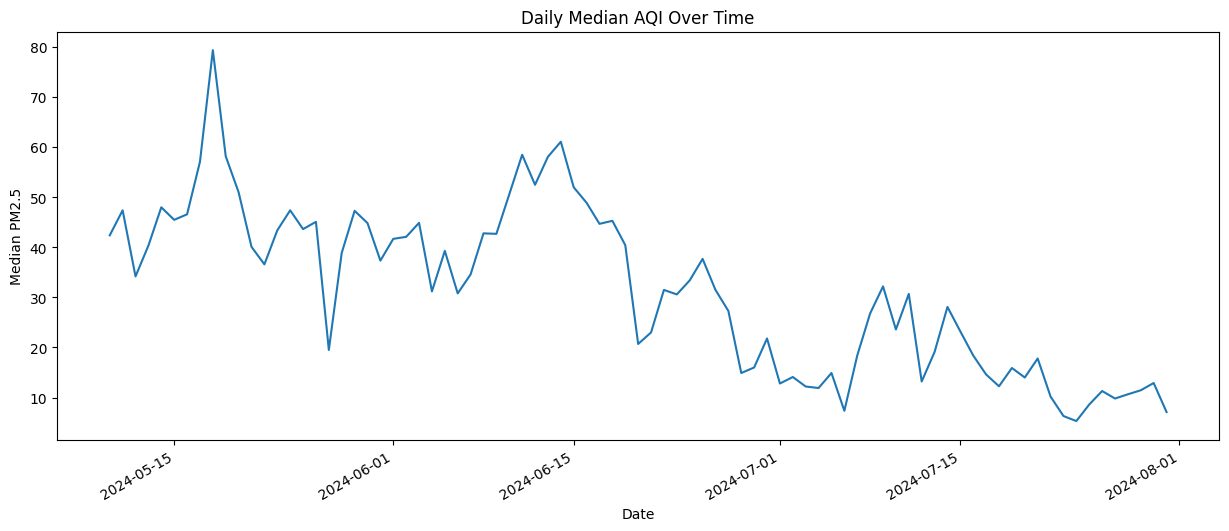

In [44]:
fig,ax = plt.subplots(figsize=(15,6))
df["median"].plot(xlabel="Date",ylabel="Median PM2.5", title="Daily Median AQI Over Time",ax=ax)

There's much zig-zag! If only we could see if there's some trend.

### Rolling Average(weekly)

<Axes: title={'center': 'Daily Median AQI Over Time'}, xlabel='Date', ylabel='Median PM2.5'>

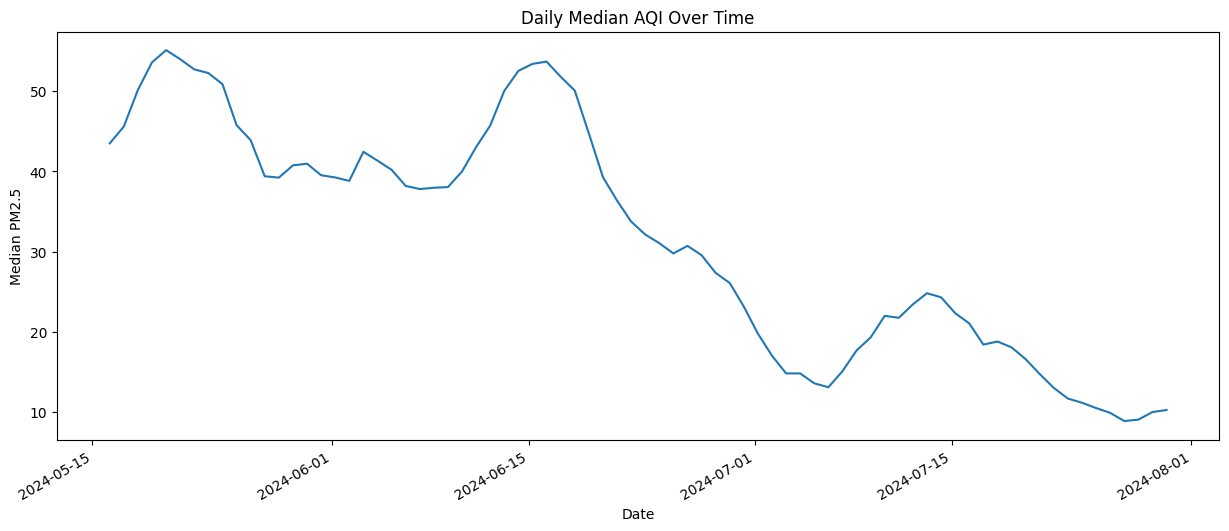

In [55]:
fig,ax = plt.subplots(figsize=(15,6))
df["median"].rolling(7).mean().plot(xlabel="Date",ylabel="Median PM2.5", title="Daily Median AQI Over Time",ax=ax)

Yup, this is quite comfortable to read. The trend is decreasing value in median of AQI over the time.

### BoxPlot

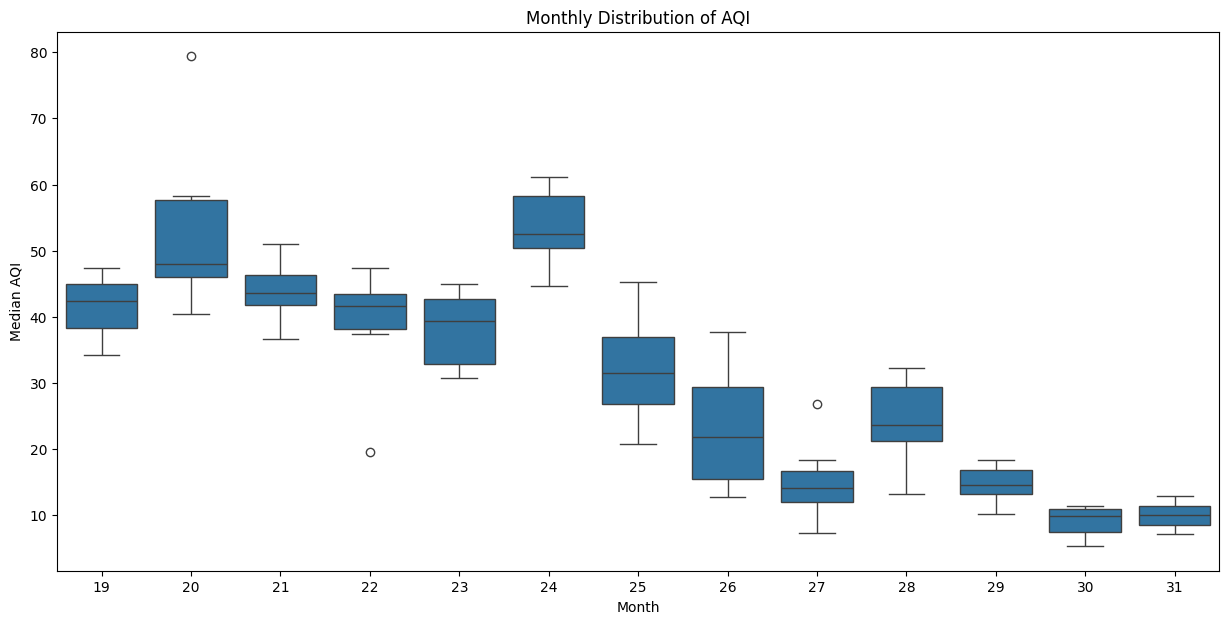

In [69]:
plt.figure(figsize=(15, 7))
sns.boxplot(x=df.index.isocalendar().week, y=df['median'])
plt.title('Monthly Distribution of AQI')
plt.xlabel('Month')
plt.ylabel('Median AQI')
plt.show()

Box plot of Median Data over the week. We can see some very light outliers too. 

<Axes: >

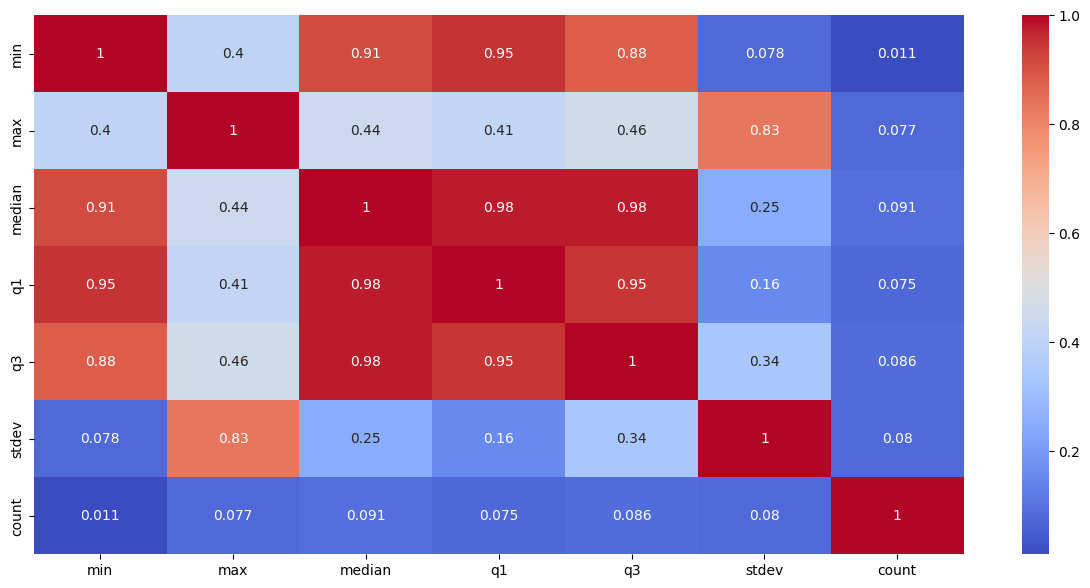

In [72]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [ ]:
# df.drop(columns=["count","max","min","q1","q3"])

In [85]:
df1 = df[["median","stdev"]]
y=df["median"] #For model.
df1.head()

,median,stdev
2024-05-10 05:45:00+05:45,42.40,4.538
2024-05-11 05:45:00+05:45,47.40,4.665
2024-05-12 05:45:00+05:45,34.20,9.423
2024-05-13 05:45:00+05:45,40.35,4.886
2024-05-14 05:45:00+05:45,48.00,6.032
